# NSF Computer and Information Science and Engineering (CISE) 

- `05050000`: Division of Computer and Network Systems (CNS)
- `05010000`: Division of Computing and Communication Foundations (CCF)
- `05020000`: Division of Information and Intelligent Systems (IIS)
- `05090000`: Office of Advanced Cyberinfrastructure (OAC)

In [1]:
import os,sys,json
import core.nsf_utils
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
from collections import Counter

In [2]:
data = {}
years = [2009]
for y in years:
    data.update(core.nsf_utils.load_numpub_data(y))
grant_type = ["Standard Grant", "Continuing grant"] # draw only these types
div_type = {
    "05050000": "Division of Computer and Network Systems (CNS)",
    "05010000": "Division of Computing and Communication Foundations (CCF)",
    "05020000": "Division of Information and Intelligent Systems (IIS)",
    "05090000": "Office of Advanced Cyberinfrastructure (OAC)"
}

In [3]:
for y in years:
    print("[{}]".format(y))
    print("Total number of grants", len([v for v in data.values() if v["year"] == y]))
    for code, desc in div_type.items():
        print(desc, len([v for v in data.values() if v["org"] == code and v["year"] == y]))

[2009]
Total number of grants 15398
Division of Computer and Network Systems (CNS) 735
Division of Computing and Communication Foundations (CCF) 537
Division of Information and Intelligent Systems (IIS) 629
Office of Advanced Cyberinfrastructure (OAC) 211


In [4]:
def num_pub_histogram(data, orgcode, pick_number):
    numpub_count = Counter([v["num_pubs"] for v in data.values() if v["org"] == orgcode])
#     print(numpub_count)
    x = range(1, 41)
    y = [numpub_count[i] if i in numpub_count else 0 for i in x]
    print("{} grants have #pub < 0".format(numpub_count[0]))
    print("{} grants have #pub > 40".format(sum(numpub_count.values())-sum(y)-numpub_count[0]))
    c = ["g" if i == pick_number else "b" for i in x]
    
    plt.figure(figsize=(18,3))
    plt.bar(x, y, color=c)
    plt.ylabel('Num of grants')
    plt.xlabel('Num of publications')
    plt.title("[NSF {} {}-{}] pub histogram".format(div_type[orgcode], years[0], years[-1]))
    plt.show()
    
    citations = []
    for k, v in data.items():
        if v["org"] == orgcode and v["num_pubs"] == pick_number:
            grant_info = core.nsf_utils.get_grant_publications(k)
            pubresearch = grant_info["publicationResearch"]
            pubconference = grant_info["publicationConference"]
            citations.extend([p["citationCount"] for p in pubresearch])
            citations.extend([p["citationCount"] for p in pubconference])
#             print(k)
    numcit_count = Counter(citations)
    
    x = range(0, 101)
    y = [numcit_count[i] if i in numcit_count else 0 for i in x]
    c = ["g" for i in x]
    print("Total {} grants with {} publications".format(numpub_count[pick_number], pick_number))
    print("{} grants have #pub > 100".format(sum(numcit_count.values())-sum(y)))
    plt.figure(figsize=(18,3))
    plt.bar(x, y, color=c)
    plt.ylabel('Num of grants')
    plt.xlabel('Num of citations per publication')
    plt.title("[NSF {} {}-{}] citation histogram".format(div_type[orgcode], years[0], years[-1]))
    plt.show()

236 grants have #pub < 0
8 grants have #pub > 40


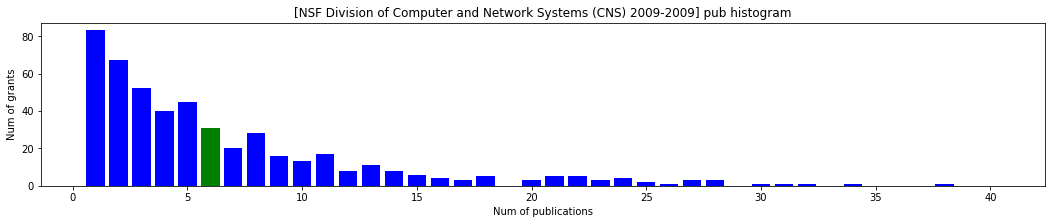

Total 31 grants with 6 publications
13 grants have #pub > 100


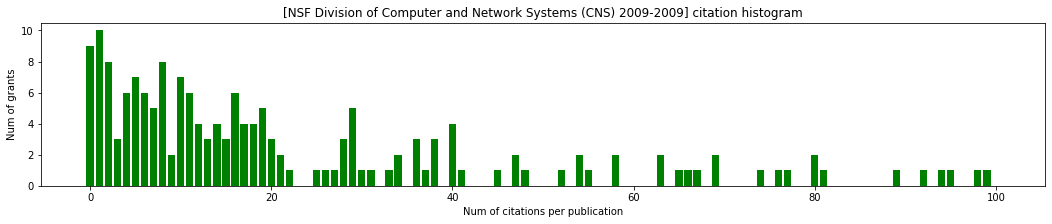

In [5]:
num_pub_histogram(data, "05050000", 6)

129 grants have #pub < 0
7 grants have #pub > 40


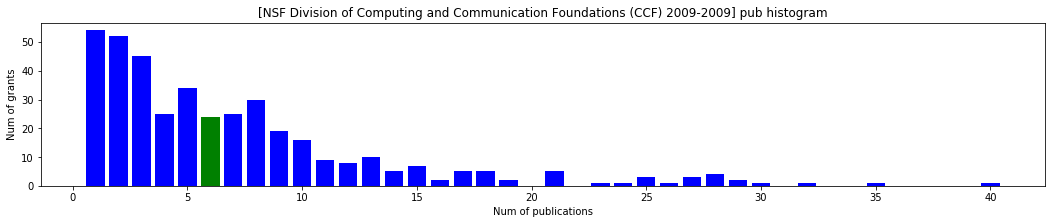

Total 24 grants with 6 publications
2 grants have #pub > 100


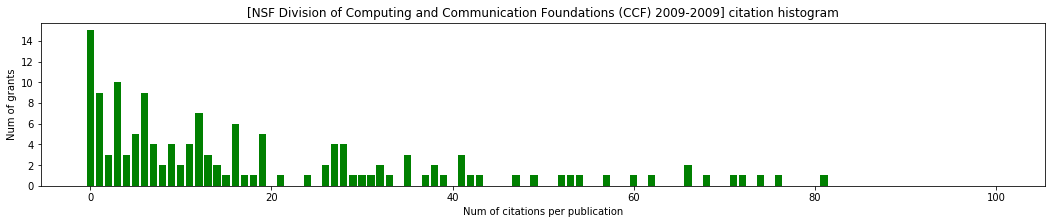

In [6]:
num_pub_histogram(data, "05010000", 6)

199 grants have #pub < 0
7 grants have #pub > 40


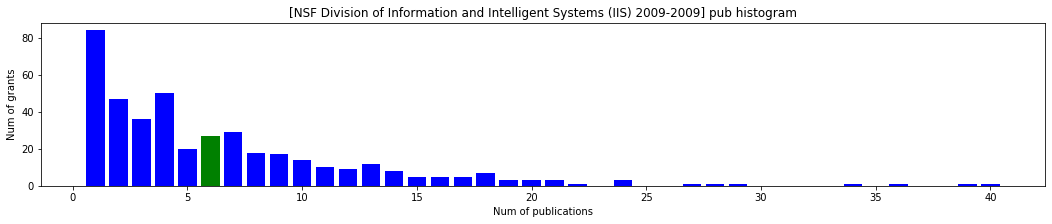

Total 27 grants with 6 publications
16 grants have #pub > 100


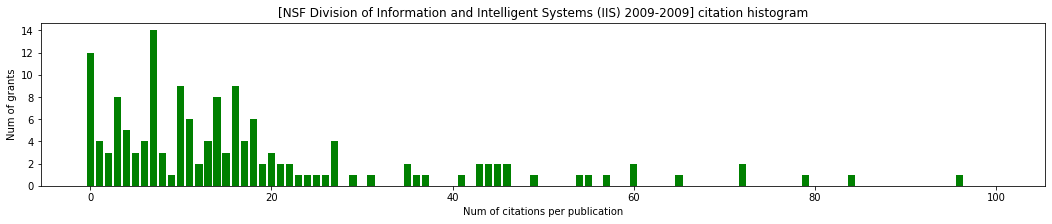

In [7]:
num_pub_histogram(data, "05020000", 6)

84 grants have #pub < 0
5 grants have #pub > 40


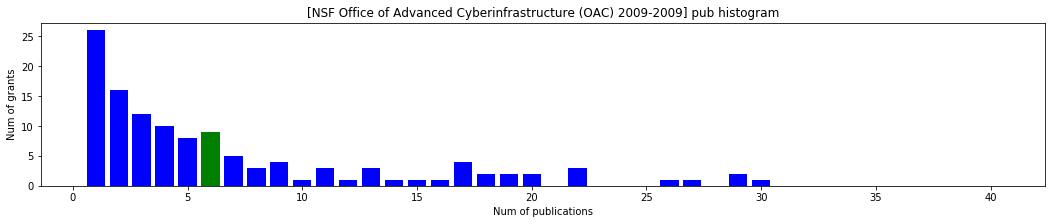

Total 9 grants with 6 publications
4 grants have #pub > 100


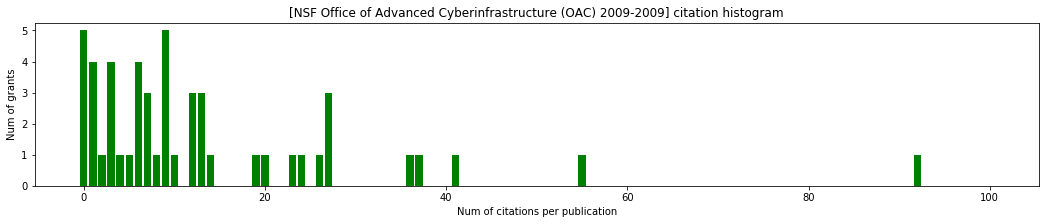

In [8]:
num_pub_histogram(data, "05090000", 6)